In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd

In [19]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [102]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func

In [21]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [22]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [105]:
# View classes by through inspector
inspector=inspect (engine)
inspector.get_table_names()

# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [31]:
# Check header labels
# Source: https://stackoverflow.com/questions/52251066/how-to-get-column-name-from-sqlalchemy
Station.__table__.columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [33]:
# Check header labels
# Source: https://stackoverflow.com/questions/52251066/how-to-get-column-name-from-sqlalchemy
Measurement.__table__.columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

# Exploratory Climate Analysis

('2017-08-23',)


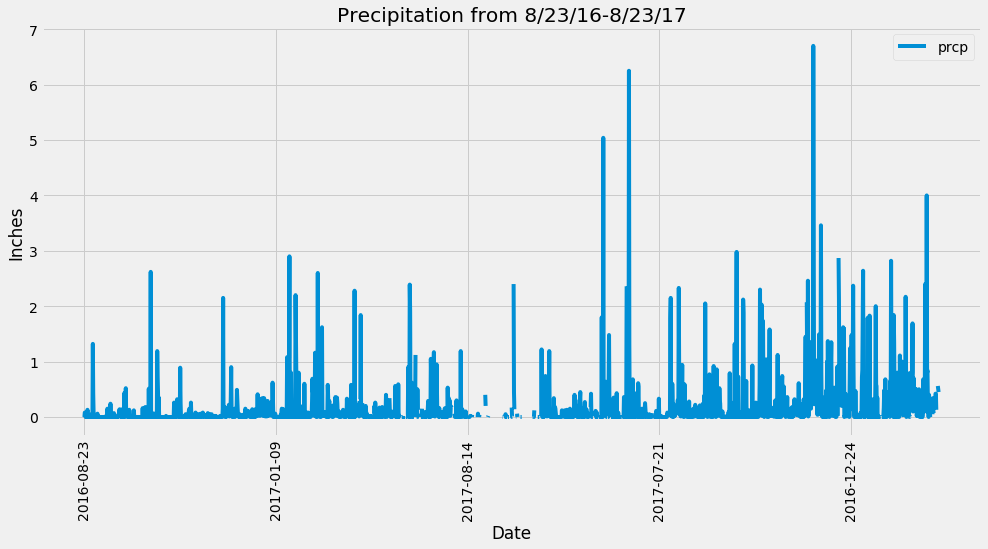

In [117]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Source: https://stackoverflow.com/questions/8551952/how-to-get-last-record
Date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(Date)

# Perform a query to retrieve the date and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data_df = pd.DataFrame(data)
data_df = data_df.set_index("date")
data_df.head()

# Sort the dataframe by date
# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html
data_df.sort_index()
data_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
# Source: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
data_df.plot(title="Precipitation from 8/23/16-8/23/17", rot=90, figsize=(15,7))
plt.ylabel("Inches")
plt.xlabel("Date")
plt.show()

In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [88]:
# Design a query to show how many stations are available in this dataset?
# Source: https://stackoverflow.com/questions/14754994/why-is-sqlalchemy-count-much-slower-than-the-raw-query
count = session.query(func.count(Station.id)).all()
print(count)

[(9,)]


In [107]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [124]:
# Using the station id from the previous query, calculate the lowest temperature recorded.
# Source: https://stackoverflow.com/questions/7133007/sqlalchemy-get-max-min-avg-values-from-a-table
station_min = session.query(func.min(Measurement.tobs).filter(Measurement.station == "USC00519281")).all()
print(station_min)

# Using the station id from the previous query, calculate the highest temperature recorded.
station_max = session.query(func.max(Measurement.tobs).filter(Measurement.station == "USC00519281")).all()
print(station_max)

# Using the station id from the previous query, calculate the average temperature of the most active station.
station_average = session.query(func.avg(Measurement.tobs).filter(Measurement.station == "USC00519281")).all()
print(station_average)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


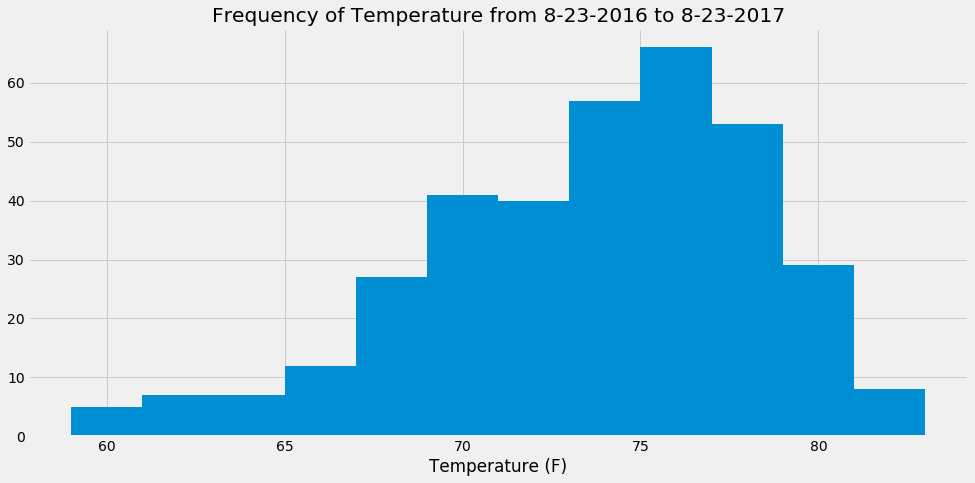

In [130]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == "USC00519281").\
            filter(Measurement.date >= "2016-08-23").all()
year_data


#Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
year_data_df = pd.DataFrame(year_data)
year_data_df.hist(bins=12, figsize = (15,7))
plt.xlabel("Temperature (F)")
plt.title("Frequency of Temperature from 8-23-2016 to 8-23-2017")
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
